# CALIDAD DEL AIRE DE MADRID EN 2018

### Importación de librerías

In [73]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.arima.model import ARIMA



### Importación de los datos de todos los meses de 2018

In [74]:
enero = pd.read_csv('../data/2018/ene_mo18.csv', delimiter=';')
febrero = pd.read_csv('../data/2018/feb_mo18.csv', delimiter=';')
marzo = pd.read_csv('../data/2018/mar_mo18.csv', delimiter=';')
abril = pd.read_csv('../data/2018/abr_mo18.csv', delimiter=';')
mayo = pd.read_csv('../data/2018/may_mo18.csv', delimiter=';')
junio = pd.read_csv('../data/2018/jun_mo18.csv', delimiter=';')
julio = pd.read_csv('../data/2018/jul_mo18.csv', delimiter=';')
agosto = pd.read_csv('../data/2018/ago_mo18.csv', delimiter=';')
septiembre = pd.read_csv('../data/2018/sep_mo18.csv', delimiter=';')
octubre = pd.read_csv('../data/2018/oct_mo18.csv', delimiter=';')
noviembre = pd.read_csv('../data/2018/nov_mo18.csv', delimiter=';')
diciembre = pd.read_csv('../data/2018/dic_mo18.csv', delimiter=';')

### Unión de todos los datos de los meses de 2018 en un solo dataframe

In [75]:
data_2018 = pd.concat([enero, febrero, marzo, abril, 
                       mayo, junio, julio, agosto, 
                       septiembre, octubre, noviembre, diciembre
                       ], ignore_index=True)

### Display de los datos de 2018

In [76]:
data_2018.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,4,1,28079004_1_38,2018,1,1,1.0,V,...,2.0,V,1.0,V,1.0,V,1.0,V,1.0,V
1,28,79,4,1,28079004_1_38,2018,1,2,1.0,V,...,1.0,V,1.0,V,1.0,V,2.0,V,2.0,V
2,28,79,4,1,28079004_1_38,2018,1,3,1.0,V,...,2.0,V,2.0,V,2.0,V,3.0,V,2.0,V
3,28,79,4,1,28079004_1_38,2018,1,4,2.0,V,...,2.0,V,1.0,V,1.0,V,1.0,V,1.0,V
4,28,79,4,1,28079004_1_38,2018,1,5,1.0,V,...,2.0,V,2.0,V,2.0,V,1.0,V,2.0,V


El CSV anterior presenta datos sobre la calidad del aire de Madrid en 2018. Los datos son los siguientes:
- Provincia: Comunidad de Madrid (28).
- Municipio: Madrid (79).
- Magnitud: código de sustancias en el aire.
- HX: Hace referencia a la hora, siendo por ejemplo H01 la primera hora de la mañana de ese día.
- VX: Hace referencia a si los datos han sido validados o no. Por ejemplo, si de un día concreto la casilla V01 contiene una 'V' significa que este dato fue validado.

### Eliminación de datos innecesarios y comprobaciones

Voy a eliminar todas las filas que no tengan en su casilla correspondiente en la columna 'MAGNITUD' un '8'(código del NO2).

In [77]:
data_2018 = data_2018[data_2018['MAGNITUD'] == 8].reset_index(drop=True)

# Comprobación de los resultados
data_2018['MAGNITUD'].unique()

array([8])

Comprobación de que en la columna 'PROVINCIA' solo esté el valor '28' (código de la Comunidad de Madrid).

In [78]:
data_2018['PROVINCIA'].unique()

array([28])

Comprobación de que en la columna 'MUNICIPIO' solo esté el valor '79' (código de Madrid).

In [79]:
data_2018['MUNICIPIO'].unique()

array([79])

Resultado.

In [80]:
data_2018.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,4,8,28079004_8_8,2018,1,1,15.0,V,...,39.0,V,35.0,V,27.0,V,23.0,V,11.0,V
1,28,79,4,8,28079004_8_8,2018,1,2,13.0,V,...,38.0,V,41.0,V,47.0,V,55.0,V,47.0,V
2,28,79,4,8,28079004_8_8,2018,1,3,35.0,V,...,53.0,V,47.0,V,51.0,V,56.0,V,41.0,V
3,28,79,4,8,28079004_8_8,2018,1,4,35.0,V,...,42.0,V,36.0,V,35.0,V,34.0,V,28.0,V
4,28,79,4,8,28079004_8_8,2018,1,5,24.0,V,...,53.0,V,54.0,V,52.0,V,46.0,V,44.0,V


### Exploración de los datos de 2018

In [81]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8750 entries, 0 to 8749
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PROVINCIA       8750 non-null   int64  
 1   MUNICIPIO       8750 non-null   int64  
 2   ESTACION        8750 non-null   int64  
 3   MAGNITUD        8750 non-null   int64  
 4   PUNTO_MUESTREO  8750 non-null   object 
 5   ANO             8750 non-null   int64  
 6   MES             8750 non-null   int64  
 7   DIA             8750 non-null   int64  
 8   H01             8750 non-null   float64
 9   V01             8750 non-null   object 
 10  H02             8750 non-null   float64
 11  V02             8750 non-null   object 
 12  H03             8750 non-null   float64
 13  V03             8750 non-null   object 
 14  H04             8750 non-null   float64
 15  V04             8750 non-null   object 
 16  H05             8750 non-null   float64
 17  V05             8750 non-null   o

### Resumen estadístico

In [82]:
data_2018.describe().T

,count,mean,std,min,25%,50%,75%,max
PROVINCIA,8750.0,28.000000,0.000000,28.0,28.0,28.0,28.0,28.0
MUNICIPIO,8750.0,79.000000,0.000000,79.0,79.0,79.0,79.0,79.0
ESTACION,8750.0,37.760914,17.617998,4.0,24.0,40.0,55.0,60.0
MAGNITUD,8750.0,8.000000,0.000000,8.0,8.0,8.0,8.0,8.0
ANO,8750.0,2018.000000,0.000000,2018.0,2018.0,2018.0,2018.0,2018.0
MES,8750.0,6.524457,3.448795,1.0,4.0,7.0,10.0,12.0
DIA,8750.0,15.723429,8.797052,1.0,8.0,16.0,23.0,31.0
H01,8750.0,38.396000,29.682680,0.0,16.0,29.0,55.0,199.0
H02,8750.0,31.512914,25.706086,0.0,12.0,23.0,45.0,166.0
H03,8750.0,25.818514,22.346275,0.0,9.0,18.0,37.0,150.0


### Modificación de los datos de 'PUNTO_MUESTREO'

Esta columna muestra en primer lugar el número de la estación, el número que le sigue después de la primera barra baja es la magnitud y el número que sigue a la segunda barra baja es la técnica de muestreo (ej: XXXXXXXX_X_X). Pero debido a que ya existe una columna denominada 'MAGNITUD' y para que no se repita la información, voy a eliminar la columna 'ESTACION' y a añadir una que se llame 'TECNICA_MUESTREO'. Además voy a añadir una columna que se llame 'NOMBRE' que incluya el nombre de la estación.

In [83]:
# Eliminación de la columna 'ESTACION'

data_2018.drop('ESTACION', axis=1, inplace=True)

In [84]:
# Creación de la columna 'TECNICA_MUESTREO' que contenga los últimos dígitos de la columna 'PUNTO_MUESTREO' 

data_2018['TECNICA_MUESTREO'] = data_2018['PUNTO_MUESTREO'].apply(lambda x: x.split('_')[-1])

In [85]:
# Eliminación de parte de los datos de 'PUNTO_MUESTREO' que no se correspondan únicamente con la estación de medida

data_2018['PUNTO_MUESTREO'] = data_2018['PUNTO_MUESTREO'].apply(lambda x: x.split('_')[0])


In [86]:
# Cambio de nombre de la columna 'PUNTO_MUESTREO' a 'ESTACION'

data_2018.rename(columns={'PUNTO_MUESTREO': 'ESTACION'}, inplace=True)

In [87]:
columna_a_mover = 'TECNICA_MUESTREO'

# Creación de una lista con el nuevo orden de las columnas
nuevo_orden = [col for col in data_2018 if col != columna_a_mover]
nuevo_orden.insert(3, columna_a_mover)

# Reordenar el DataFrame con el nuevo orden de columnas
data_2018 = data_2018[nuevo_orden]

In [88]:
# Resultado de la modificación

data_2018.head()

,PROVINCIA,MUNICIPIO,MAGNITUD,TECNICA_MUESTREO,ESTACION,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,8,8,28079004,2018,1,1,15.0,V,...,39.0,V,35.0,V,27.0,V,23.0,V,11.0,V
1,28,79,8,8,28079004,2018,1,2,13.0,V,...,38.0,V,41.0,V,47.0,V,55.0,V,47.0,V
2,28,79,8,8,28079004,2018,1,3,35.0,V,...,53.0,V,47.0,V,51.0,V,56.0,V,41.0,V
3,28,79,8,8,28079004,2018,1,4,35.0,V,...,42.0,V,36.0,V,35.0,V,34.0,V,28.0,V
4,28,79,8,8,28079004,2018,1,5,24.0,V,...,53.0,V,54.0,V,52.0,V,46.0,V,44.0,V


### Importación de los datos de las estaciones de muestreo

Se puede observar a continuación que ahora del dataframe 'data_2018', los datos de la columna 'ESTACION' coinciden con los datos de la columna 'STATION' 

In [89]:
estaciones = pd.read_csv('../data/madrid_air_quality_stations.csv')
estaciones

,station,area,name,address,altitude,type,longitude,latitude
0,28079004,centro,Pza. de España,Plaza de España,635,UT,-3.712247,40.423853
1,28079008,centro,Escuelas Aguirre,Entre C/ Alcalá y C/ O' Donell,670,UT,-3.682319,40.421564
2,28079011,centro,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,708,UT,-3.677356,40.451475
3,28079016,noreste,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,693,UF,-3.639233,40.440047
4,28079017,suroeste,Villaverde,C/. Juan Peñalver,604,UF,-3.713322,40.347139
5,28079018,suroeste,Farolillo,Calle Farolillo - C/Ervigio,630,UF,-3.731853,40.394781
6,28079024,noroeste,Casa de Campo,Casa de Campo (Terminal del Teleférico),642,S,-3.747347,40.419356
7,28079027,noreste,Barajas Pueblo,C/. Júpiter 21 (Barajas),621,UF,-3.580031,40.476928
8,28079035,centro,Pza. del Carmen,Plaza del Carmen esq. Tres Cruces.,659,UF,-3.703172,40.419208
9,28079036,sureste,Moratalaz,Avd. Moratalaz esq. Camino de los Vinateros,685,UT,-3.645306,40.407947


Como he mencionado anteriormente voy a crear en el dataframe 'data_2018' una nueva columna llamada 'NOMBRE' con los nombres de las estaciones de muestreo.

In [90]:
# Creación de un diccionario con los valores de los códigos de las estaciones y sus nombres
dictio_nombre = pd.Series(estaciones['name'].values, index = estaciones['station']).to_dict()
dictio_nombre

{28079004: 'Pza. de España',
 28079008: 'Escuelas Aguirre',
 28079011: 'Avda. Ramón y Cajal',
 28079016: 'Arturo Soria',
 28079017: 'Villaverde',
 28079018: 'Farolillo',
 28079024: 'Casa de Campo',
 28079027: 'Barajas Pueblo',
 28079035: 'Pza. del Carmen',
 28079036: 'Moratalaz',
 28079038: 'Cuatro Caminos',
 28079039: 'Barrio del Pilar',
 28079040: 'Vallecas',
 28079047: 'Mendez Alvaro',
 28079048: 'Castellana',
 28079049: 'Parque del Retiro',
 28079050: 'Plaza Castilla',
 28079054: 'Ensanche de Vallecas',
 28079055: 'Urb. Embajada',
 28079056: 'Pza. Fernández Ladreda',
 28079057: 'Sanchinarro',
 28079058: 'El Pardo',
 28079059: 'Juan Carlos I',
 28079060: 'Tres Olivos'}

In [91]:
# Cambio del tipo de dato de string a integer
data_2018['ESTACION'] = data_2018['ESTACION'].astype(int)

In [92]:
# Mapeo de los datos de 'ESTACION' a 'NOMBRE'
data_2018['NOMBRE'] = data_2018['ESTACION'].map(dictio_nombre)

In [93]:
# Ordenación de las columnas
columna_a_mover = 'NOMBRE'

# Creación de una lista con el nuevo orden de las columnas
nuevo_orden = [col for col in data_2018 if col != columna_a_mover]
nuevo_orden.insert(5, columna_a_mover)

# Reordenación el dataframe con el nuevo orden de columnas
data_2018 = data_2018[nuevo_orden]

In [94]:
data_2018.head()

,PROVINCIA,MUNICIPIO,MAGNITUD,TECNICA_MUESTREO,ESTACION,NOMBRE,ANO,MES,DIA,H01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,8,8,28079004,Pza. de España,2018,1,1,15.0,...,39.0,V,35.0,V,27.0,V,23.0,V,11.0,V
1,28,79,8,8,28079004,Pza. de España,2018,1,2,13.0,...,38.0,V,41.0,V,47.0,V,55.0,V,47.0,V
2,28,79,8,8,28079004,Pza. de España,2018,1,3,35.0,...,53.0,V,47.0,V,51.0,V,56.0,V,41.0,V
3,28,79,8,8,28079004,Pza. de España,2018,1,4,35.0,...,42.0,V,36.0,V,35.0,V,34.0,V,28.0,V
4,28,79,8,8,28079004,Pza. de España,2018,1,5,24.0,...,53.0,V,54.0,V,52.0,V,46.0,V,44.0,V


### Comprobación de datos validados

Tal y como he explicado antes, las columnas que comienzan con una 'V' seguida por un número, hace referencia a si los datos de esa hora (el número) fueron validados o no. Quiero calcular cuántos hay de cada tipo (validados y no validados).

In [95]:
# Selección columnas que comiencen con 'V'
columnas_v = data_2018.filter(regex='^V')

# Obtención del recuento de valores únicos de esas columnas
recuento = columnas_v.apply(lambda x: x.value_counts())
recuento

,V01,V02,V03,V04,V05,V06,V07,V08,V09,V10,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
V,8733,8733,8709,8730,8731,8732,8733,8732,8719,8679,...,8700,8709,8705,8704,8706,8718,8730,8737,8736,8735
N,17,17,41,20,19,18,17,18,31,71,...,50,41,45,46,44,32,20,13,14,15


Voy a calcular el porcentaje de datos validados y no validados para ver si el resultado es relevante.

In [96]:
porcentaje = recuento.apply(lambda x: (x / x.sum()) * 100, axis=0)
porcentaje

,V01,V02,V03,V04,V05,V06,V07,V08,V09,V10,...,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
V,99.805714,99.805714,99.531429,99.771429,99.782857,99.794286,99.805714,99.794286,99.645714,99.188571,...,99.428571,99.531429,99.485714,99.474286,99.497143,99.634286,99.771429,99.851429,99.84,99.828571
N,0.194286,0.194286,0.468571,0.228571,0.217143,0.205714,0.194286,0.205714,0.354286,0.811429,...,0.571429,0.468571,0.514286,0.525714,0.502857,0.365714,0.228571,0.148571,0.16,0.171429


Se puede observar en el dataframe anterior que los datos no validados en la mayoría de los casos no superan el 1% del total de los datos, por lo que no creo que sea algo que vaya a afectar realmente a la estimación de los datos. Por ello, voy a eliminar todas las columnas que confirman o no la validación de los datos.

In [97]:
data_2018 = data_2018.drop(data_2018.filter(regex='^V').columns, axis=1)

In [98]:
# Resultado de la modificación
data_2018.head()

,PROVINCIA,MUNICIPIO,MAGNITUD,TECNICA_MUESTREO,ESTACION,NOMBRE,ANO,MES,DIA,H01,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,H24
0,28,79,8,8,28079004,Pza. de España,2018,1,1,15.0,...,15.0,10.0,14.0,25.0,32.0,39.0,35.0,27.0,23.0,11.0
1,28,79,8,8,28079004,Pza. de España,2018,1,2,13.0,...,39.0,36.0,36.0,34.0,34.0,38.0,41.0,47.0,55.0,47.0
2,28,79,8,8,28079004,Pza. de España,2018,1,3,35.0,...,43.0,36.0,37.0,37.0,49.0,53.0,47.0,51.0,56.0,41.0
3,28,79,8,8,28079004,Pza. de España,2018,1,4,35.0,...,23.0,24.0,22.0,26.0,35.0,42.0,36.0,35.0,34.0,28.0
4,28,79,8,8,28079004,Pza. de España,2018,1,5,24.0,...,34.0,31.0,32.0,42.0,51.0,53.0,54.0,52.0,46.0,44.0


### Cambio del formato de la fecha de los datos

Voy a cambiar el formato del dataframe para que la fecha y la hora exacta de la recogida de cada dato se convierta en el índice y que así sea más fácil aplicar el modelo de predicción a tres días vista. 

In [99]:
# Creación de la columna 'FECHA' fusionando las columnas 'ANO', 'MES', 'DIA', transformándolas primero a string
data_2018['FECHA'] = data_2018['ANO'].astype(str) + '-' + data_2018['MES'].astype(str) + '-' + data_2018['DIA'].astype(str)

# Eliminación de las columnas originales 'ANO', 'MES', 'DIA'
data_2018.drop(['ANO', 'MES', 'DIA'], axis=1, inplace=True)

In [100]:
columna_a_mover = 'FECHA'

# Creación de una lista con el nuevo orden de las columnas
nuevo_orden = [col for col in data_2018 if col != columna_a_mover]
nuevo_orden.insert(0, columna_a_mover)

# Reordenación el dataframe con el nuevo orden de columnas
data_2018 = data_2018[nuevo_orden]

In [101]:
# Cambio del tipo de dato de la columna 'FECHA' a datetime
data_2018['FECHA'] = pd.to_datetime(data_2018['FECHA'])

# Creación de una lista de columnas de horas
horas = [f'H{i:02d}' for i in range(1, 25)]

# Reestructuración el dataFrame para incluir todas las horas de cada día
data_2018 = (data_2018
            .melt(id_vars=['PROVINCIA', 'MUNICIPIO', 'MAGNITUD', 'TECNICA_MUESTREO', 'ESTACION', 'NOMBRE', 'FECHA'], 
                  value_vars=horas, 
                  var_name='HORA', 
                  value_name='DATOS'))


In [102]:
# Resultados
data_2018.head()

,PROVINCIA,MUNICIPIO,MAGNITUD,TECNICA_MUESTREO,ESTACION,NOMBRE,FECHA,HORA,DATOS
0,28,79,8,8,28079004,Pza. de España,2018-01-01,H01,15.0
1,28,79,8,8,28079004,Pza. de España,2018-01-02,H01,13.0
2,28,79,8,8,28079004,Pza. de España,2018-01-03,H01,35.0
3,28,79,8,8,28079004,Pza. de España,2018-01-04,H01,35.0
4,28,79,8,8,28079004,Pza. de España,2018-01-05,H01,24.0


### Cambio del formato de la hora de los datos

Los datos de la columna 'HORA' vienen presentados con una 'H' inicial seguida de un número del 1 al 24. Voy a modificar esto para poder pasarlos de string a datetime.

In [103]:
# Eliminación de la 'H' inicial
data_2018['HORA'] = data_2018['HORA'].str.replace('H', '')

In [104]:
# Comprobación de los valores únicos
data_2018['HORA'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24'], dtype=object)

In [105]:
# Modificación del dato de '24' a '00'
data_2018['HORA'] = data_2018['HORA'].str.replace('24', '00')

In [106]:
# Combinación de las columnas 'FECHA' y 'HORA'
data_2018['FECHA'] += pd.to_timedelta(data_2018['HORA'].str.zfill(2) + ':00:00')

# Eliminación de la columna 'HORA'
data_2018.drop('HORA', axis=1, inplace=True)

In [107]:
# Cambio del nombre de la columna 'FECHA' a 'FECHA_HORA'
data_2018.rename(columns={'FECHA': 'FECHA_HORA'}, inplace=True)

In [108]:
# Resultados
data_2018.head()

,PROVINCIA,MUNICIPIO,MAGNITUD,TECNICA_MUESTREO,ESTACION,NOMBRE,FECHA_HORA,DATOS
0,28,79,8,8,28079004,Pza. de España,2018-01-01 01:00:00,15.0
1,28,79,8,8,28079004,Pza. de España,2018-01-02 01:00:00,13.0
2,28,79,8,8,28079004,Pza. de España,2018-01-03 01:00:00,35.0
3,28,79,8,8,28079004,Pza. de España,2018-01-04 01:00:00,35.0
4,28,79,8,8,28079004,Pza. de España,2018-01-05 01:00:00,24.0


Ahora los datos están ordenados según la hora, es decir, que primero se muestran todos los datos de la primera hora de la mañana, aunque sea de un mes o estación diferente, luego todos los datos de la segunda hora y así sucesivamente. Es por esto que los voy a ordenar segúnla fecha y la hora y la estación, para que sean más fáciles de interpretar.

In [109]:
data_2018 = data_2018.sort_values(by=['NOMBRE', 'FECHA_HORA'])

In [110]:
# Resultados 
data_2018.head()

,PROVINCIA,MUNICIPIO,MAGNITUD,TECNICA_MUESTREO,ESTACION,NOMBRE,FECHA_HORA,DATOS
201343,28,79,8,8,28079016,Arturo Soria,2018-01-01 00:00:00,35.0
93,28,79,8,8,28079016,Arturo Soria,2018-01-01 01:00:00,12.0
8843,28,79,8,8,28079016,Arturo Soria,2018-01-01 02:00:00,26.0
17593,28,79,8,8,28079016,Arturo Soria,2018-01-01 03:00:00,39.0
26343,28,79,8,8,28079016,Arturo Soria,2018-01-01 04:00:00,17.0


Debido a que los datos ya están limpios, se pueden exportar a CSV.

In [111]:
#data_2018.to_csv('../data/calidad_aire_limpio.csv', index=False)

### Visualización de los datos para sacar conclusiones

#### En primer lugar, voy a visualizar en un mapa los puntos en los que se encuentran las estaciones de muestreo. 

In [112]:
# Carga de los datos de los barrios de Madrid en un GeoDataFrame
madrid = gpd.read_file("http://darribas.org/gds4ae/_downloads/44b4bc22c042386c2c0f8dc6685ef17c/neighbourhoods.geojson")

In [113]:
# Creación de un GeoDataFrame con la geometría de los puntos
gdf = gpd.GeoDataFrame(estaciones, geometry = gpd.points_from_xy(estaciones.longitude, estaciones.latitude))

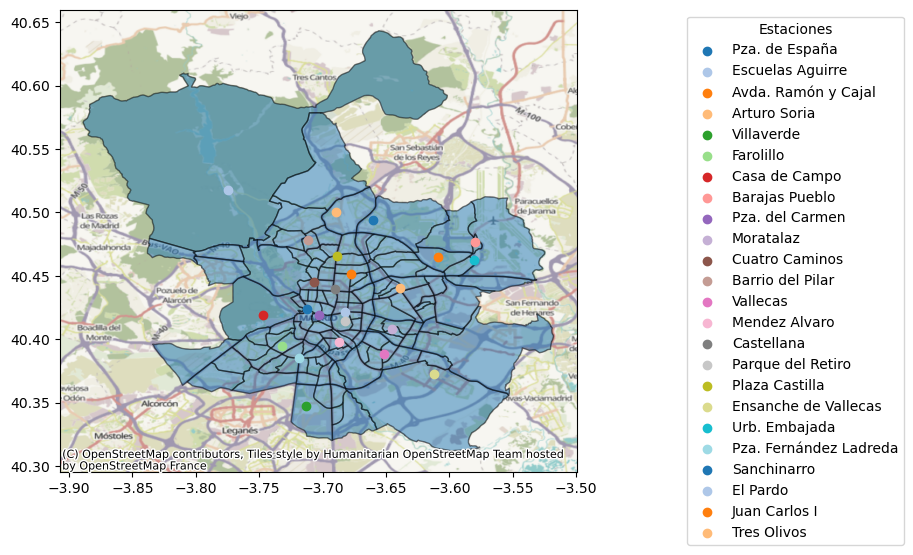

In [114]:
# Creación del mapa base de Madrid
ax = madrid.plot(figsize = (10, 6), alpha = 0.5, edgecolor = 'k')

# Asignación de un color único a cada punto basado en la columna 'name' (la zona/calle en la que está)
unique_stations = gdf['name'].unique()
tab20 = sns.color_palette("tab20", len(unique_stations))
set3 = sns.color_palette("Set3", len(unique_stations))
combined_palette = tab20 + set3

color_dict = dict(zip(unique_stations, combined_palette))

# Agregación de los puntos al mapa con colores únicos
for station, color in color_dict.items():
    gdf[gdf['name'] == station].plot(ax = ax, color = color, label = station)

# Agregación de un fondo de mapa
ctx.add_basemap(ax, crs = madrid.crs)

# Configuración de la leyenda
plt.legend(title = 'Estaciones', loc = 'upper left', bbox_to_anchor = (1.2, 1))

# Resultados
plt.show()

Como se puede observar, hay estaciones distribuidas a lo largo de todo Madrid, con más estaciones en las zonas más habitadas, confluidas... pero también con estaciones a las afueras para tener datos fiables.

#### Comparación de la calidad del aire según las estaciones

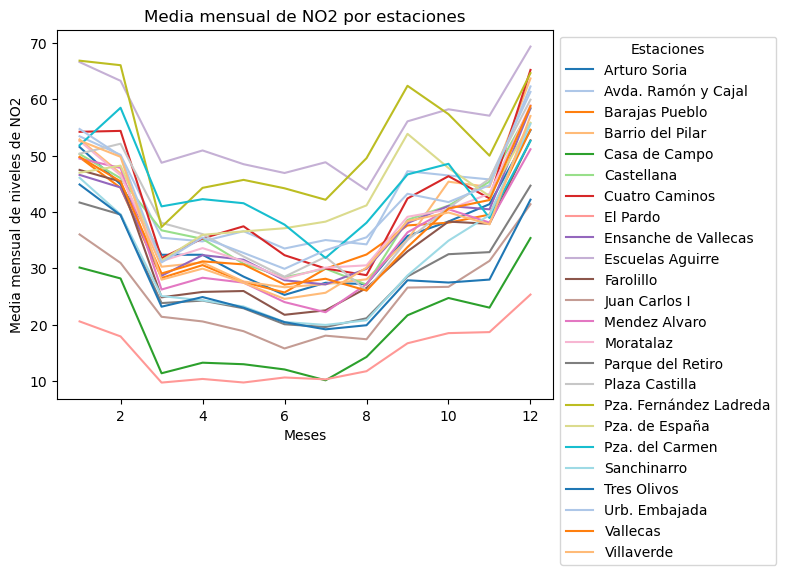

In [115]:
# Extracción del mes y el año de la columna 'FECHA_HORA'
data_2018['MES'] = data_2018['FECHA_HORA'].dt.month
data_2018['AÑO'] = data_2018['FECHA_HORA'].dt.year

# Calculo de la media mensual de los datos para cada estación
monthly_mean = data_2018.groupby(['NOMBRE', 'AÑO', 'MES']).mean().reset_index()

# Creación del gráfico de líneas múltiples con los datos de la media mensual
categorias = monthly_mean['NOMBRE'].unique() 
colores = sns.color_palette("tab20", n_colors=len(categorias)) 
sns.set_palette(colores) 

for i, (nombre, grupo) in enumerate(monthly_mean.groupby('NOMBRE')):
    plt.plot(grupo['MES'], grupo['DATOS'], label=nombre, color=colores[i])
    
# Configuración de los ejes y título
plt.xlabel('Meses')
plt.ylabel('Media mensual de niveles de NO2')
plt.title('Media mensual de NO2 por estaciones')

# Configuración de la leyenda
plt.legend(title='Estaciones', loc='upper left', bbox_to_anchor=(1, 1))

# Mostrar el gráfico
plt.show()

### Conclusiones

El NO2 es un contaminante atmosférico, de origen principalmente antropogénico, cuyas fuentes fundamentales son el tráfico rodado, así como las emisiones de determinadas industrias y grandes instalaciones de combustión.

Sabiendo eso, el gráfico anterior cobra más sentido. Empezando por que las zonas con menos concentración de NO2 son El Pardo y la Casa de Campo, zonas verdes en las que el tráfico está muy limitado. Por otro lado, se ve un aumento de la presencia de esta sustancia en el aire entre los meses de octubre y febrero, meses en los que llueve mucho y hace frío, por lo que es más cómodo transportarse en coche. Además de que en los meses más soleados mucha gente toma de alternativa caminar o ir en bicicleta de un lado a otro, también mucha gente se va de vacaciones, por lo que tiene sentido también esta bajada. 

Tal y como comentaba anteriormente, creo que sería interesante implementar datos de tráfico o condiciones meteorológicas en la visualización para analizar numéricamente y no solo como suposición su relación con los niveles de NO2.

### Modelo de predicción

Como los datos tienen mediciones horarias a lo largo de todo 2018, es probable que la serie temporal exhiba cierto grado de estacionalidad y autocorrelación, lo cual hace que el modelo ARIMA sea una opción razonable y por lo que he querido aplicarlo en este caso. 

In [116]:
# Fijado de la columna 'FECHA_HORA' como índice
data = data_2018.set_index('FECHA_HORA')

# Agrupación de los datos por fecha y calcular la media diaria de NO2
no2_diario = data['DATOS'].resample('D').mean()

In [117]:
# Creación del modelo ARIMA
modelo = ARIMA(no2_diario, order=(5,1,0))

# Ajuste del modelo ARIMA
modelo_fit = modelo.fit()

In [118]:
prediccion = modelo_fit.forecast(steps=3)
prediccion

2019-01-01    72.317512
2019-01-02    65.550734
2019-01-03    59.974207
Freq: D, Name: predicted_mean, dtype: float64